## PLN 
Processamento de Linguagem Natural usando NLTK (Natural Language Toolkit)

In [1]:
import nltk

In [3]:
# nltk.download_shell() - download 'stopwords' package

In [5]:
caminho = '/Users/user/Documents/Pessoal/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection'
messages = [line.rstrip() for line in open (caminho)]

In [7]:
print("Número de mensagens do arquivo de dados:")
print(len(messages))

Número de mensagens do arquivo de dados:
5574


### Alguns exemplos de mensagens

In [8]:
print(messages[0])

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [9]:
print(messages[238])

ham	Where are you?when wil you reach here?


In [10]:
print(messages[1000])

ham	Aight will do, thanks again for comin out


In [11]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

As mensagens possuem um rótulo falando se são ou não Spam

### Pré processamento dos dados

In [12]:
import pandas as pd

In [14]:
messages = pd.read_csv(caminho, sep='\t', names=['label', 'message'])

In [15]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploração inicial dos dados

In [16]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [19]:
messages['length'] = messages['message'].apply(len)

In [21]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Exploração visual dos dados

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

<Axes: xlabel='length', ylabel='Count'>

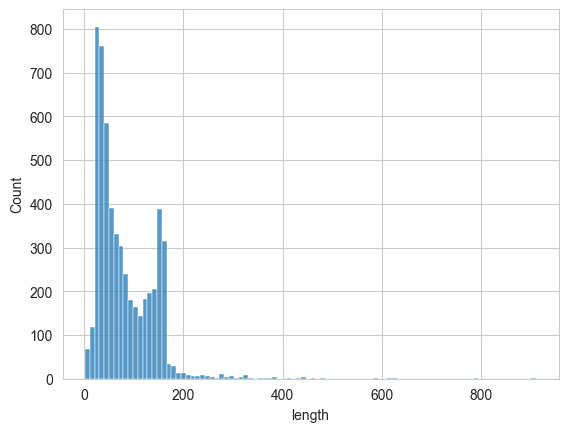

In [26]:
sns.histplot(messages, x='length')

In [27]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Verificando um dos pontos aberrantes

In [32]:
print(messages[messages['length'] == 910]['message'].iloc[0])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

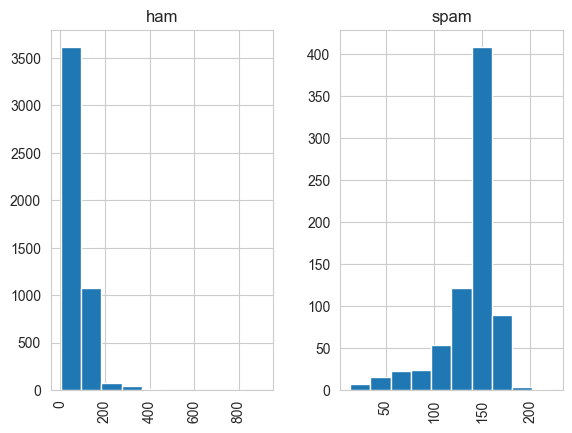

In [44]:
messages.hist(column='length', by='label')

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


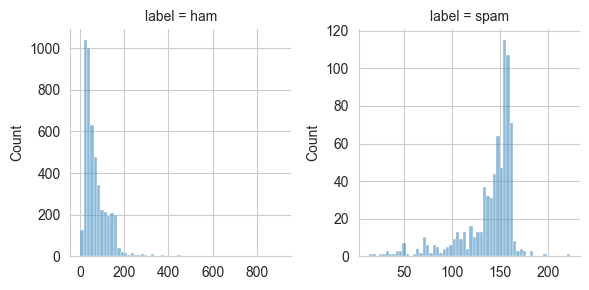

In [55]:
p = sns.FacetGrid(messages, col='label', sharey=False, sharex=False)
p.map_dataframe(sns.histplot, bins=60)

<Axes: xlabel='length', ylabel='Count'>

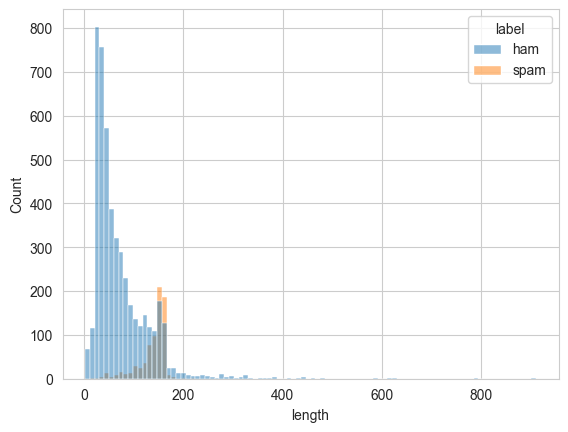

In [56]:
sns.histplot(messages, x='length', hue='label')

### Tokenização o conjunto de palavras

In [57]:
import string

In [60]:
mess = 'Sample message! Notice: it has punctuation.'

In [61]:
no_punc = [c for c in mess if c not in string.punctuation]

In [63]:
from nltk.corpus import stopwords

In [66]:
no_punc = ''.join(no_punc)

In [67]:
no_punc

'Sample message Notice it has punctuation'

In [68]:
no_punc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [69]:
clean_mes = [ word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [70]:
clean_mes

['Sample', 'message', 'Notice', 'punctuation']

In [74]:
def text_process(mess):
    '''
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    '''

    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)

    return [word for word in no_punc.split() if word.lower not in stopwords.words('english')]

In [75]:
messages['message'].head(5).apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [78]:
print(len(bow_transformer.vocabulary_))

11747


In [80]:
mess4 = messages['message'][3]

In [81]:
print(mess4)

U dun say so early hor... U c already then say...


In [82]:
bow4 = bow_transformer.transform([mess4])

In [83]:
print(bow4)

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [85]:
bow_transformer.get_feature_names_out()[9832]

'say'

In [86]:
messages_bow = bow_transformer.transform(messages['message'])

In [88]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11747)


In [89]:
messages_bow.nnz

79463

In [90]:
sparsity = (100.0 * messages_bow.nnz/(messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsity: ', sparsity)


Sparsity:  0.12140229049026034


In [91]:
from sklearn.feature_extraction.text import TfidfTransformer

In [92]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [94]:
tfidf4 = tfidf_transformer.transform(bow4)

In [95]:
print(tfidf4) # peso para cada uma das palavras 

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [97]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [98]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

### Classificar Naive Bayes

In [99]:
from sklearn.naive_bayes import MultinomialNB

In [100]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [101]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [102]:
messages['label'][3]

'ham'

In [103]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [105]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

### Separação dos dados

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3, random_state=101)

In [109]:
msg_train

4028        Yes, princess. Are you going to make me moan?
1310              Ok, be careful ! Don't text and drive !
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814                Pls i wont belive god.not only jesus.
                              ...                        
4171    Mmmmmm ... I love you,so much, Ahmad ... I can...
599     Will do. Was exhausted on train this morning. ...
1361    Yo dude guess who just got arrested the other day
1547                Shant disturb u anymore... Jia you...
4959                     Why didn't u call on your lunch?
Name: message, Length: 3900, dtype: object

### SKLEARN Pipeline

In [110]:
from sklearn.pipeline import Pipeline

In [111]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', MultinomialNB())
])

In [112]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x28f8ad260>)),
                ('tfidf', TfidfTransformer()),
                ('Classifier', MultinomialNB())])

In [113]:
predictions = pipeline.predict(msg_test)

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1475
        spam       1.00      0.58      0.73       197

    accuracy                           0.95      1672
   macro avg       0.97      0.79      0.85      1672
weighted avg       0.95      0.95      0.94      1672



### Floresta Aleatória

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('Classifier', RandomForestClassifier())
])

In [119]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x28f8ad260>)),
                ('tfidf', TfidfTransformer()),
                ('Classifier', RandomForestClassifier())])

In [120]:
predictions = pipeline.predict(msg_test)

In [121]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1475
        spam       0.99      0.74      0.85       197

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.97      1672

